<a href="https://colab.research.google.com/github/ReemAlbluwi/T5/blob/main/Weekly_Project_2_reem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [40]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score




## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df_w2 = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


## 1.1 Find the dataset information and observe the datatypes.

In [5]:
print(df_w2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12317 entries, 0 to 12316
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12317 non-null  object
 1   Day_of_week                  12317 non-null  object
 2   Age_band_of_driver           12317 non-null  object
 3   Sex_of_driver                12317 non-null  object
 4   Educational_level            11576 non-null  object
 5   Vehicle_driver_relation      11738 non-null  object
 6   Driving_experience           11488 non-null  object
 7   Type_of_vehicle              11367 non-null  object
 8   Owner_of_vehicle             11835 non-null  object
 9   Service_year_of_vehicle      8389 non-null   object
 10  Defect_of_vehicle            7890 non-null   object
 11  Area_accident_occured        12078 non-null  object
 12  Lanes_or_Medians             11932 non-null  object
 13  Road_allignment              12

## 1.2 : Check the shape of the data to understand its structure.

In [7]:

print(df_w2.shape)


(12317, 32)


## 1.3: View the the data with various functions to get an initial sense of the data.

In [6]:
print(df_w2.head())

       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [50]:
print(df_w2.tail())

           Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
12312 -1.073667    -1.095076           -0.349051       0.082711   
12313 -1.073667    -1.095076           -0.349051       0.082711   
12314  0.583988    -0.277296           -0.349051       0.082711   
12315  0.583988    -0.277296           -0.917210       0.082711   
12316  1.702735     0.540484           -0.349051       0.082711   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
12312           0.581513                -0.448934            0.845032   
12313           0.581513                 2.230096            0.042730   
12314          -1.621202                -0.448934           -0.759571   
12315           0.581513                -0.448934           -0.759571   
12316           0.581513                -0.448934            1.647333   

       Type_of_vehicle  Owner_of_vehicle  Service_year_of_vehicle  ...  \
12312        -0.039964         -3.000122                 0.846647  ...   
12313     

## 1.4 : Perform summary statistics on the dataset to grasp central tendencies and variability.

In [8]:
print(df_w2.describe())

            Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12317       12317              12317         12317   
unique      1075           8                  6             4   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11576                   11738              11488   
unique                   8                       5                  8   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11367            11835                    8389  ...   
unique              19                5                       7  ...   
top         Automobile            Owner                 Unknown  ...   
freq              32

## 1.5 : Check for duplicated data.

In [52]:
print(df_w2.duplicated().sum())

0


## 1.6 : Check for null values.

In [53]:
print (df_w2.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [15]:
print(df_w2.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [17]:

imputer = SimpleImputer(strategy='most_frequent')
df_w2_imputed = pd.DataFrame(imputer.fit_transform(df_w2))
df_w2_imputed.columns = df_w2.columns
print(df_w2_imputed.isnull().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

## 3. 1 : Heatmap of Correlation Matrix.

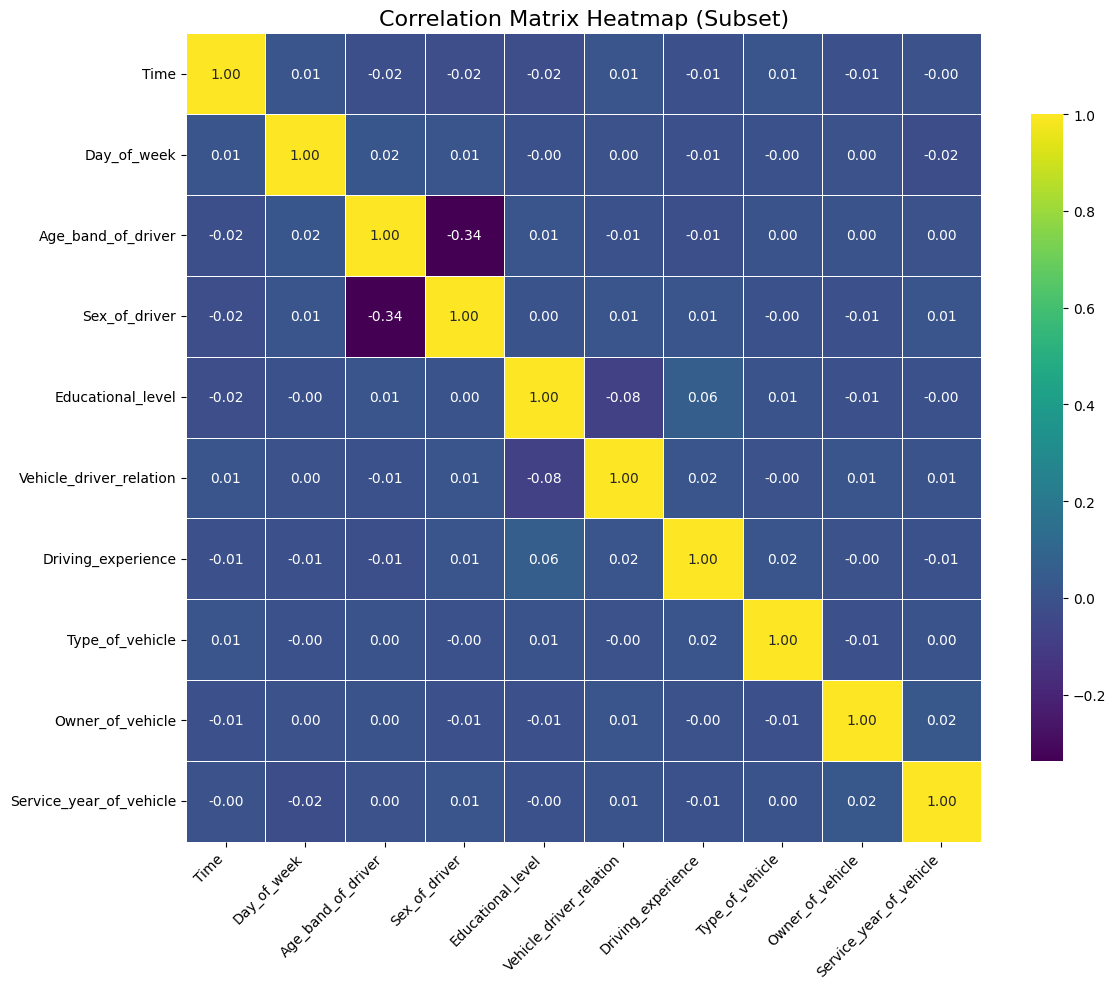

In [24]:
# Select a subset of columns to plot the heatmap.
selected_columns = df_w2.corr().columns[:10]  # Choose the first 10 columns for correlation
correlation_matrix = df_w2[selected_columns].corr()

# Set eye-friendly colors and formatting
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f',
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

# Additional details for graphic formatting
plt.title('Correlation Matrix Heatmap (Subset)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


## 3.2 :Line plots

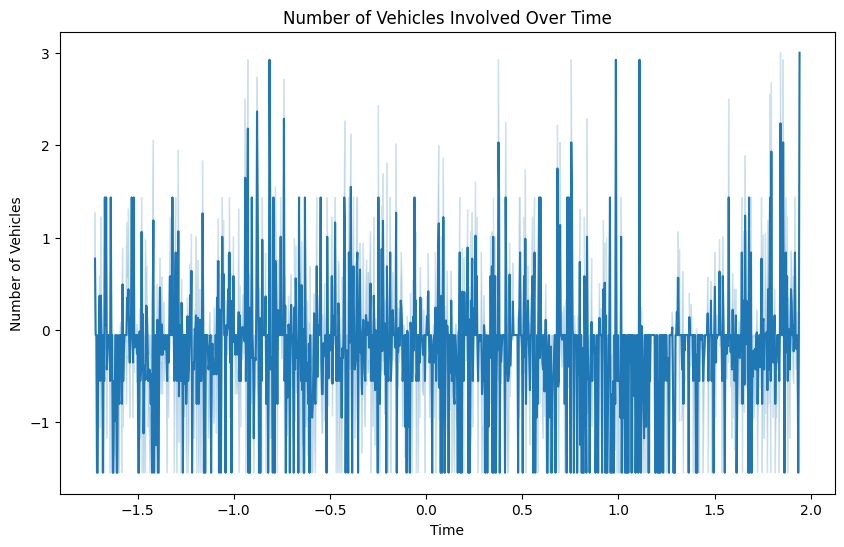

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Number_of_vehicles_involved', data=df_w2_imputed)
plt.title('Number of Vehicles Involved Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.show()

## Scatter plots

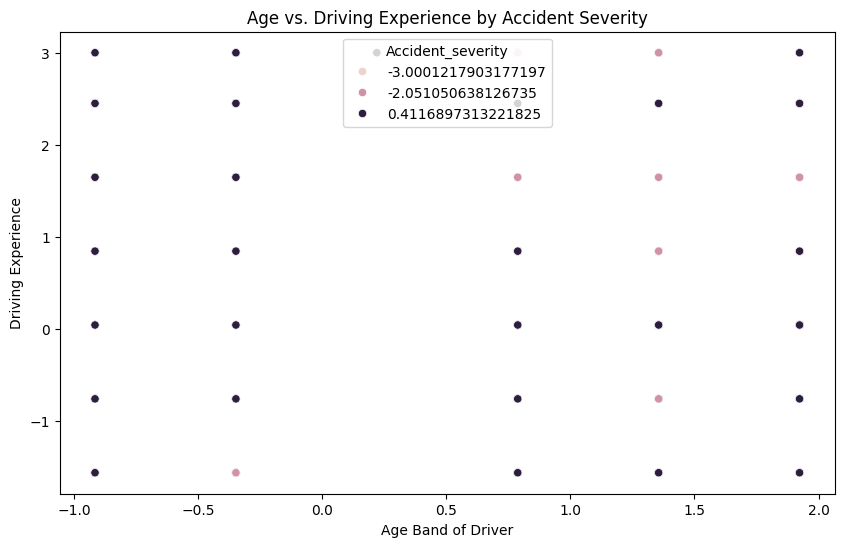

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_band_of_driver', y='Driving_experience', hue='Accident_severity', data=df_w2_imputed)
plt.title('Age vs. Driving Experience by Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Driving Experience')
plt.show()

## Histograms

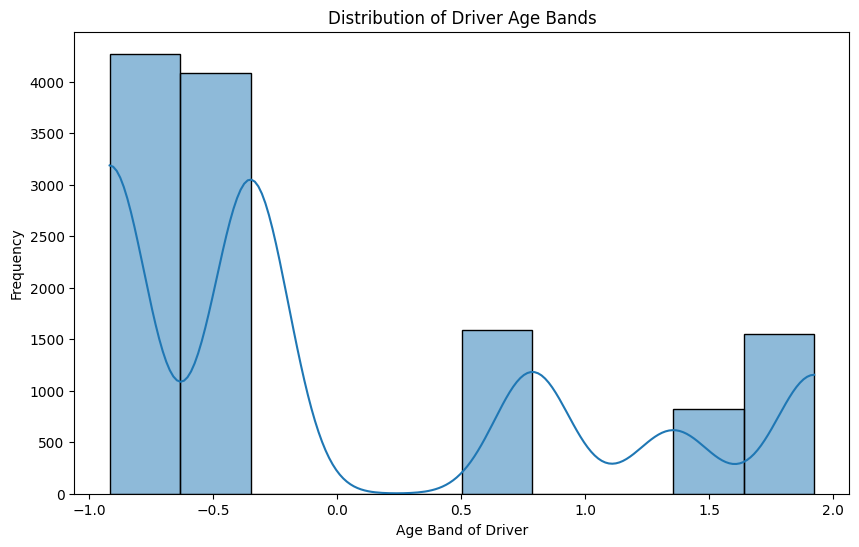

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df_w2_imputed['Age_band_of_driver'], bins=10, kde=True)
plt.title('Distribution of Driver Age Bands')
plt.xlabel('Age Band of Driver')
plt.ylabel('Frequency')
plt.show()

## Boxplots

<ipython-input-60-f30db99b75d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_of_week', y='Number_of_casualties', data=df_sample, palette='Set2')  # You can change 'Set2' to any other palette


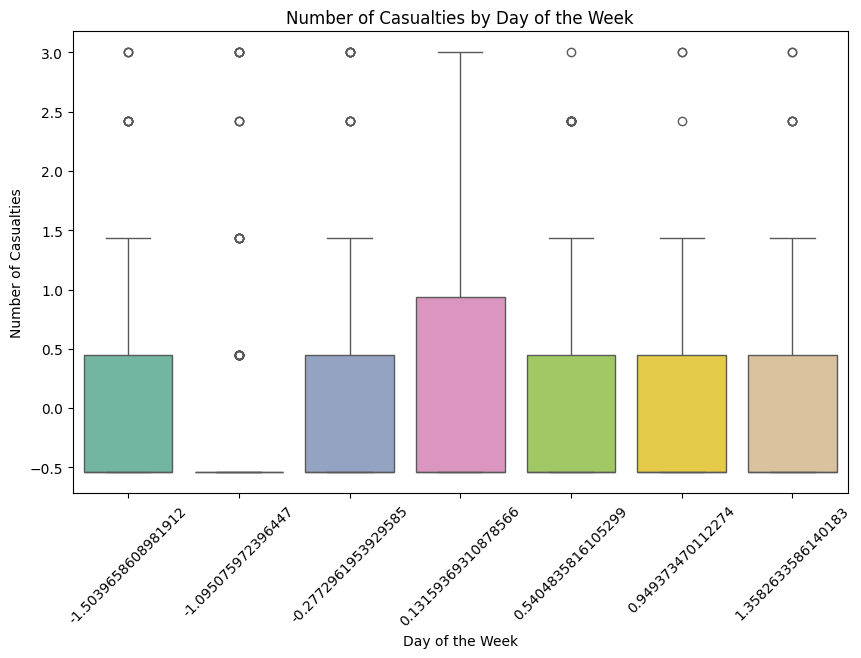

In [60]:

sample_fraction = 0.1
df_sample = df_w2_imputed.sample(frac=sample_fraction, random_state=42)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Number_of_casualties', data=df_sample, palette='Set2')
plt.title('Number of Casualties by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()



## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [33]:
features = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
            'Educational_level', 'Type_of_vehicle', 'Driving_experience',
            'Service_year_of_vehicle', 'Number_of_vehicles_involved',
            'Number_of_casualties', 'Area_accident_occured',
            'Lanes_or_Medians', 'Road_surface_type', 'Light_conditions',
            'Weather_conditions', 'Type_of_collision', 'Cause_of_accident']

X = df_w2_imputed[features]
y = df_w2_imputed['Accident_severity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

df_w2['Accident_severity_class'] = df_w2['Accident_severity'].astype('category').cat.codes
X = df_w2.drop(['Accident_severity', 'Accident_severity_class'], axis=1)
y = df_w2['Accident_severity_class']
X = pd.get_dummies(X)

#Split datasit = train , test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.841991341991342

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00       548
           2       0.84      1.00      0.91      3112

    accuracy                           0.84      3696
   macro avg       0.28      0.33      0.30      3696
weighted avg       0.71      0.84      0.77      3696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree Classifier

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a DataFrame called df_w2

# Convert the target variable to categories (if not already categorical)

df_w2['Accident_severity_class'] = df_w2['Accident_severity'].astype('category').cat.codes

# Prepare data for training
X = df_w2.drop(['Accident_severity', 'Accident_severity_class'], axis=1)
y = df_w2['Accident_severity_class']

# Convert categorical values to numbers
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.753517316017316

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.33      0.26        36
           1       0.25      0.27      0.26       548
           2       0.86      0.84      0.85      3112

    accuracy                           0.75      3696
   macro avg       0.44      0.48      0.46      3696
weighted avg       0.77      0.75      0.76      3696



#### Support Vector Machine (SVM)

In [46]:
# prompt: Support Vector Machine (SVM)

from sklearn.svm import SVC

# Assuming you have a DataFrame called df_w2

# Convert the target variable to categories (if not already categorical)
df_w2['Accident_severity_class'] = df_w2['Accident_severity'].astype('category').cat.codes

# Prepare data for training
X = df_w2.drop(['Accident_severity', 'Accident_severity_class'], axis=1)
y = df_w2['Accident_severity_class']

# Convert categorical values to numbers
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.841991341991342

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00       548
           2       0.84      1.00      0.91      3112

    accuracy                           0.84      3696
   macro avg       0.28      0.33      0.30      3696
weighted avg       0.71      0.84      0.77      3696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Neighbors Classifier

In [47]:
# prompt: K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
# Assuming you have a DataFrame called df_w2

# Convert the target variable to categories (if not already categorical)
df_w2['Accident_severity_class'] = df_w2['Accident_severity'].astype('category').cat.codes

# Prepare data for training
X = df_w2.drop(['Accident_severity', 'Accident_severity_class'], axis=1)
y = df_w2['Accident_severity_class']

# Convert categorical values to numbers
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8222402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.17      0.03      0.05       548
           2       0.84      0.97      0.90      3112

    accuracy                           0.82      3696
   macro avg       0.34      0.33      0.32      3696
weighted avg       0.73      0.82      0.77      3696



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Precision, Recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # ROC Curve and AUC (for multi-class classification)
    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_test))

    # Compute ROC curve and AUC for each class
    roc_auc = {}
    for i in range(y_test_binarized.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr, tpr)
        print(f"AUC for class {i}: {roc_auc[i]}")

# Evaluate each model
print("Logistic Regression Evaluation:")
evaluate_model(logreg, X_test, y_test)

print("\nDecision Tree Evaluation:")
evaluate_model(decision_tree, X_test, y_test)

print("\nSVM Evaluation:")
evaluate_model(svm_model, X_test, y_test)

print("\nKNN Evaluation:")
evaluate_model(knn, X_test, y_test)


Logistic Regression Evaluation:
Confusion Matrix:
 [[   0    0   36]
 [   0    0  548]
 [   0    0 3112]]
Accuracy: 0.841991341991342
Precision: 0.708949419988381
Recall: 0.841991341991342
F1-score: 0.7697641175902045
AUC for class 0: 0.5
AUC for class 1: 0.5
AUC for class 2: 0.5

Decision Tree Evaluation:
Confusion Matrix:
 [[  12    3   21]
 [   8  148  392]
 [  36  451 2625]]
Accuracy: 0.753517316017316
Precision: 0.7660656467456382
Recall: 0.753517316017316
F1-score: 0.7594770305692893
AUC for class 0: 0.6606557377049179
AUC for class 1: 0.5629272206197423
AUC for class 2: 0.568158608303694

SVM Evaluation:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[   0    0   36]
 [   0    0  548]
 [   0    0 3112]]
Accuracy: 0.841991341991342
Precision: 0.708949419988381
Recall: 0.841991341991342
F1-score: 0.7697641175902045
AUC for class 0: 0.5
AUC for class 1: 0.5
AUC for class 2: 0.5

KNN Evaluation:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[   0    2   34]
 [   0   18  530]
 [   2   89 3021]]
Accuracy: 0.8222402597402597
Precision: 0.7340121217438786
Recall: 0.8222402597402597
F1-score: 0.7677646852701723
AUC for class 0: 0.4997267759562842
AUC for class 1: 0.5019697363173465
AUC for class 2: 0.502502465049125


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:



1. **Faced difficulty with plotting due to the size of the data and the inability to read it**:
   - Due to the large size of the data, it was challenging to display charts clearly. Large datasets can lead to cluttered visualizations that are difficult to interpret, requiring special strategies to simplify the presentation and improve readability.

2. **Contained a significant amount of missing data**:
   - The dataset had a substantial amount of missing values, which affected the quality of the analysis and visualizations. Missing values can introduce noise and impact the accuracy of the models used.

3. **Data was split into training and testing sets**:
   - The data was divided into training and testing sets. This process is essential to ensure that the model learns from one set of data and is evaluated on a different set, providing a more accurate assessment of the model's performance.

4. **Generated a heatmap and had to take a small sample of 10 columns to display the plot clearly and make it easier to read**:
   - To make the heatmap more readable, a smaller sample of 10 columns was used instead of displaying all columns in the chart. This simplification helps present the information more clearly and allows for more effective analysis without overwhelming the viewer with excessive data.

5. **The model showed the following accuracies with different models**:
   - **Logistic Regression**: 0.84
   - **Decision Tree Classifier**: 0.75
   - **Support Vector Machine (SVM)**: 0.84
   - **K-Neighbors Classifier**: 0.82

   Logistic Regression and Support Vector Machine (SVM) achieved excellent accuracy, while the Decision Tree Classifier showed lower performance. Each model reflects different levels of performance based on the data and analysis.